<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Logistic_Regression_(Anisha_Mohan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [4]:
data = pd.read_csv("/content/bank-full.csv",sep=';')

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
data.head(10)
data.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


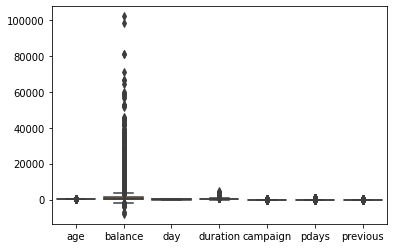

In [8]:
sb.boxplot(data =data,orient = "v") 

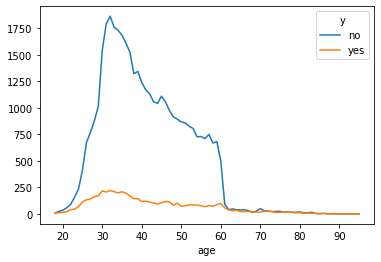

In [9]:
pd.crosstab(data.age,data.y).plot(kind="line")

In [10]:
data['outcome'] = data.y.map({'no':0, 'yes':1})
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


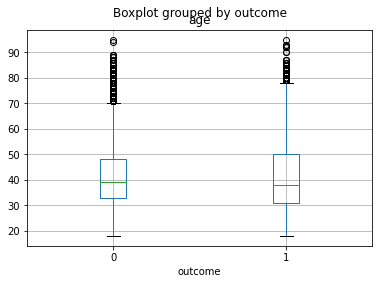

In [11]:
data.boxplot(column='age', by='outcome')

In [12]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = data[feature_col]
Y = data[output_target]

In [13]:
classifier = LogisticRegression()

In [14]:
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
classifier.coef_

array([[ 7.69721666e-03,  3.72191061e-05,  3.54908901e-03,
        -1.39828310e-01]])

In [16]:
classifier.predict_proba (X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [17]:
y_pred = classifier.predict(X)


In [18]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [21]:
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


Text(0.5, 15.0, 'Predicted Label')

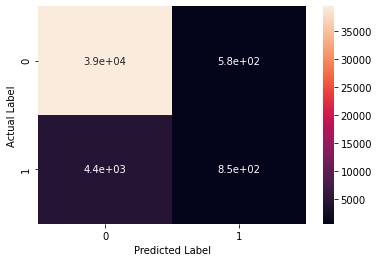

In [22]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [23]:
import statsmodels.api as sm   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
logit = sm.Logit(Y, X)  

In [25]:
logit.fit().summary() 

Optimization terminated successfully.
         Current function value: 0.325947
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Jul 2021   Pseudo R-squ.:                 0.09679
Time:                        13:16:50   Log-Likelihood:                -14736.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0581      0.001    -73.443      0.000      -0.060      -0.057
balance     3.673e-05   4.25e-06      8.651      0.000    2.84e-05     4.5e-05
duration       0.0030   5.26e-05     56.719      0.000       0.003       0.003
campaign      -0.2811      0.011    -25.646      0.000      -0.303      -0.260
==============================================================================
"""